In [1]:
from celestify.bolometric_corrections import BolometricCorrections

Holoviews not imported. Some visualizations will not be available.


PyMultiNest not imported.  MultiNest fits will not work.


In [2]:
bands = ["G", "BP", "RP"]
bc = BolometricCorrections(bands)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [3]:
import numpy as np

In [4]:
teff = np.linspace(3000, 9000, 40)
logg = np.linspace(2.5, 5.0, 45)
feh = np.linspace(-1.0, 0.5, 50)
av = 0
dims = (teff, logg, feh, av)

coords = np.stack([x.ravel() for x in np.meshgrid(*dims, indexing="ij")], -1)
corr = bc(coords)

In [5]:
import matplotlib.pyplot as plt

In [6]:
shape = [np.size(dim) for dim in dims]
grid = coords.reshape(shape + [len(dims)])
corr_grid = corr.reshape(shape + [len(bands)])

In [7]:
bc_grid = np.stack([x.ravel() for x in np.meshgrid(*bc.points, indexing="ij")], -1)

In [8]:
minval = coords.min(0)
maxval = coords.max(0)
mask = (np.greater_equal(bc_grid, minval) & np.less_equal(bc_grid, maxval)).all(1)

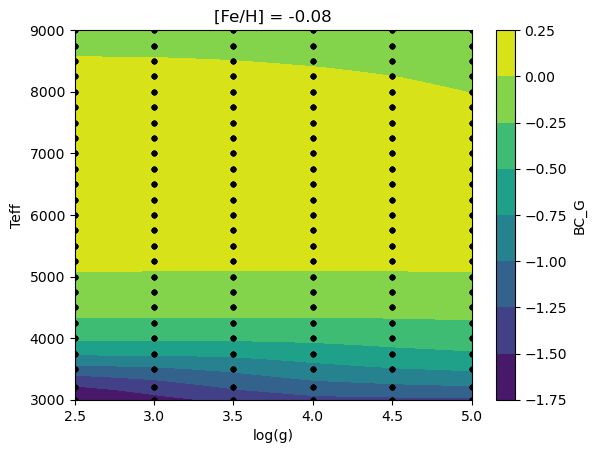

In [9]:
i = 0
j = 30

fig, ax = plt.subplots()

c = ax.contourf(logg, teff, corr_grid[:, :, j, 0, i])
ax.plot(bc_grid[mask, 1], bc_grid[mask, 0], ".k")

ax.set_title(f"[Fe/H] = {feh[j]:.2f}")
ax.set_xlabel("log(g)")
ax.set_ylabel("Teff")
fig.colorbar(c, label=f"BC_{bands[i]}");

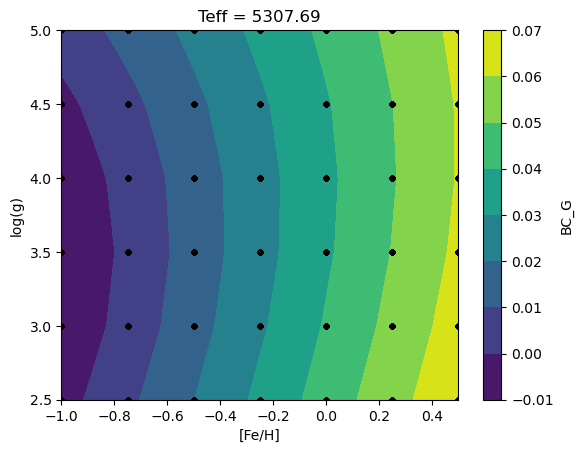

In [10]:
i = 0
j = 15

fig, ax = plt.subplots()

c = ax.contourf(feh, logg, corr_grid[j, :, :, 0, i])
ax.plot(bc_grid[mask, 2], bc_grid[mask, 1], ".k")
ax.set_title(f"Teff = {teff[j]:.2f}")
ax.set_xlabel("[Fe/H]")
ax.set_ylabel("log(g)")
fig.colorbar(c, label=f"BC_{bands[i]}");

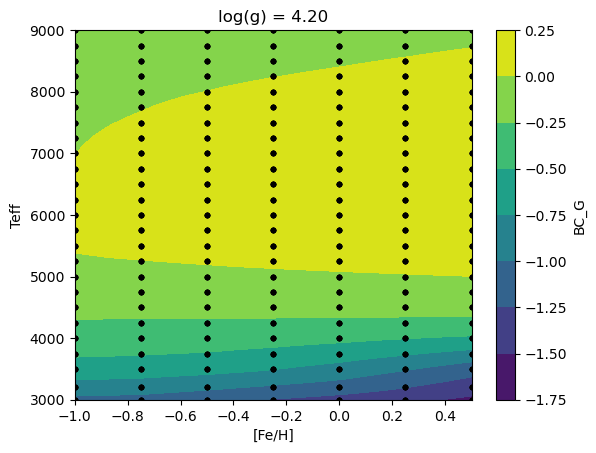

In [11]:
i = 0
j = 30

fig, ax = plt.subplots()

c = ax.contourf(feh, teff, corr_grid[:, j, :, 0, i])
ax.plot(bc_grid[mask, 2], bc_grid[mask, 0], ".k")

ax.set_title(f"log(g) = {logg[j]:.2f}")
ax.set_xlabel("[Fe/H]")
ax.set_ylabel("Teff")
fig.colorbar(c, label=f"BC_{bands[i]}");

In [15]:
corr.shape

(90000, 3)

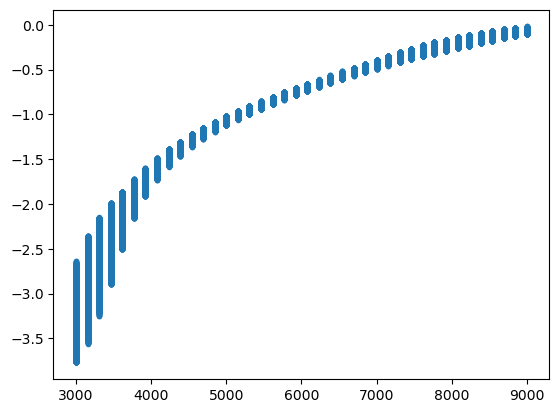

In [21]:
fig, ax = plt.subplots()

ax.plot(coords[:, 0], corr[:, 1]-corr[:, 2], ".");